# **Installing Spark**

In [1]:
 
#http://spark.apache.org/docs/latest/api/python/index.html

!pip install pyspark==3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 3.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 13.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805893 sha256=433c40ddd75247f9a0c85895d24187cd4f603824d4aa07ebba269aa8c2d4acbe
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


# **Start spark sessnon and configureation**

In [2]:
# start spark sessnon and configureation
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dat").getOrCreate()
sc = spark.sparkContext
#create an instance of SQLContext
sqlContext = SQLContext(spark)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/02/01 13:11:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# **Import libraries and other functions**

In [3]:
# Import libraries and other functions
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np



# **Create a dataFrame directly from 3 major City of England Crimes csv file**

In [4]:
#create a dataFrame directly from City of London Street Crime csv file 
#https://data.police.uk/data/

EnglandCrime = spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").\
csv("/kaggle/input/england-crime-data")

In [5]:
EnglandCrime.printSchema()

root
 |-- Crime ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported by: string (nullable = true)
 |-- Falls within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA code: string (nullable = true)
 |-- LSOA name: string (nullable = true)
 |-- Crime type: string (nullable = true)
 |-- Last outcome category: string (nullable = true)
 |-- Context: string (nullable = true)



# **Refine and Streamline Column Titles**

In [6]:
EnglandCrime = EnglandCrime.withColumnRenamed('Crime ID', 'Crime_ID')
EnglandCrime = EnglandCrime.withColumnRenamed('Reported by', 'Reported_by')
EnglandCrime = EnglandCrime.withColumnRenamed('Falls within', 'Falls_within')
EnglandCrime = EnglandCrime.withColumnRenamed('LSOA code', 'LSOA_code')
EnglandCrime = EnglandCrime.withColumnRenamed('LSOA name', 'LSOA_name')
EnglandCrime = EnglandCrime.withColumnRenamed('Crime type', 'Crime_type')
EnglandCrime = EnglandCrime.withColumnRenamed('Last outcome category', 'Last_outcome_category')

In [7]:
EnglandCrime.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)
 |-- Context: string (nullable = true)



# **Printintg fisrt 2 lines of my data**

In [8]:
EnglandCrime.take(2)

[Row(Crime_ID='f452c4f173253a9047a32f7e065820df600b01e8fa13c871121683cbd9fbad7a', Month='2022-05', Reported_by='Leicestershire Police', Falls_within='Leicestershire Police', Longitude=-1.214768, Latitude=52.622431, Location='On or near Queens Drive', LSOA_code='E01025631', LSOA_name='Blaby 002A', Crime_type='Burglary', Last_outcome_category='Awaiting court outcome', Context=None),
 Row(Crime_ID='7e8c156f99e28cf26f8ae9c05c4def8c102481e3fc3d88f8e7a6e6833fded1e7', Month='2022-05', Reported_by='Leicestershire Police', Falls_within='Leicestershire Police', Longitude=-1.214176, Latitude=52.621663, Location='On or near Lowland Avenue', LSOA_code='E01025631', LSOA_name='Blaby 002A', Crime_type='Public order', Last_outcome_category='Investigation complete; no suspect identified', Context=None)]

# **Obtain the frequency of each month, sorted from the highest to the lowest count**

In [9]:
EnglandCrime.groupby("Month").count().orderBy(desc("count")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2022-05|24734|
|2022-08|24718|
|2022-07|24375|
|2022-03|23916|
|2022-10|23795|
|2022-06|23580|
|2021-06|23141|
|2021-07|22847|
|2022-04|22809|
|2022-09|22807|
|2021-10|22801|
|2022-11|22791|
|2023-03|22750|
|2021-09|22334|
|2021-08|22080|
|2021-05|22030|
|2021-11|21887|
|2022-01|21578|
|2023-02|21399|
|2023-01|21237|
+-------+-----+
only showing top 20 rows



# **Retrieve yearly amount of crimes sorted descendantly**

In [10]:
#retrieve yearly amount of crimes sorted descendantly
EnglandCrime.select(substring(EnglandCrime.Month, 1,4).alias('Year'), "Month")\
.groupby("Year").count().orderBy(desc("count")).show()

+----+------+
|Year| count|
+----+------+
|2022|275417|
|2021|218768|
|2023| 65386|
+----+------+



# **Retrieve monthly amount of crimes (excluded year 2021) sorted descendantly**

In [11]:
#retrieve monthly amount of crimes (excluded year 2021) sorted descendantly
EnglandCrime.where((EnglandCrime.Month !='2021-03')).\
select(substring(EnglandCrime.Month, 6,7)\
                                                          \
       .alias('Month'), EnglandCrime.Month.\
                                                          \
       alias('MonthWithYear')).groupby("Month").\
count().orderBy(desc("count")).show()

+-----+-----+
|Month|count|
+-----+-----+
|   07|47222|
|   08|46798|
|   05|46764|
|   06|46721|
|   03|46666|
|   10|46596|
|   09|45141|
|   11|44678|
|   04|43737|
|   01|42815|
|   02|41966|
|   12|40109|
+-----+-----+



# **Register temp table**

In [12]:
#register temp tables 
EnglandCrime.registerTempTable("tbl_EnglandCrime")

/opt/conda/lib/python3.10/site-packages/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [13]:
sqlContext.sql("select * from tbl_EnglandCrime").show(5)

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code| LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+----------+--------------------+---------------------+-------+
|f452c4f173253a904...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.214768|52.622431|On or near Queens...|E01025631|Blaby 002A|            Burglary| Awaiting court ou...|   null|
|7e8c156f99e28cf26...|2022-05|Leicestershire Po...|Leicestershire Po...|-1.214176|52.621663|On or near Lowlan...|E01025631|Blaby 002A|        Public order| Investigation com...|   null|
|92068d66fa7c47414...|2022-05|Leicestershire Po...|Leicestershire Po..

# **Retreive monthly crime amount and order by total in descending order**


In [14]:
#retreive monthly crime amount and order by total in descending order
sqlContext.sql("select * from tbl_EnglandCrime order by Month desc").show()

+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------+--------------------+---------------------+-------+
|            Crime_ID|  Month|         Reported_by|        Falls_within|Longitude| Latitude|            Location|LSOA_code|     LSOA_name|          Crime_type|Last_outcome_category|Context|
+--------------------+-------+--------------------+--------------------+---------+---------+--------------------+---------+--------------+--------------------+---------------------+-------+
|                null|2023-03|Cambridgeshire Co...|Cambridgeshire Co...|-0.299065|52.194306|On or near Great ...|E01017542|  Bedford 004D|Anti-social behav...|                 null|   null|
|38aa0a884562ad414...|2023-03|Cambridgeshire Co...|Cambridgeshire Co...| 0.132834|52.231891|         On or near |E01017975|Cambridge 001A|Violence and sexu...| Investigation com...|   null|
|                null|2023-03|Cambridgeshire Co...

# **Create new data frame with Month and Counts per Month**

In [15]:
# Create new data frame with Month and Counts per Month
EnglandCrime2 = EnglandCrime.select(EnglandCrime.Month)\
.groupby(EnglandCrime.Month).count()

In [16]:
EnglandCrime2.printSchema()

root
 |-- Month: string (nullable = true)
 |-- count: long (nullable = false)



# **Printing count of crime by date**

In [17]:
EnglandCrime2.orderBy(desc("Month")).show()

+-------+-----+
|  Month|count|
+-------+-----+
|2023-03|22750|
|2023-02|21399|
|2023-01|21237|
|2022-12|19747|
|2022-11|22791|
|2022-10|23795|
|2022-09|22807|
|2022-08|24718|
|2022-07|24375|
|2022-06|23580|
|2022-05|24734|
|2022-04|22809|
|2022-03|23916|
|2022-02|20567|
|2022-01|21578|
|2021-12|20362|
|2021-11|21887|
|2021-10|22801|
|2021-09|22334|
|2021-08|22080|
+-------+-----+
only showing top 20 rows



# **Printintg crime count by loaction**

In [43]:
crime_count_by_location = EnglandCrime.groupBy('List of Citywise crimes', 'LSOA_name').agg(count('*').alias('Crime_count'))


In [44]:
crime_count_by_location = crime_count_by_location.orderBy('Crime_count', ascending=False)

In [45]:
crime_count_by_location.show(truncate=False)

+---------------------------+--------------------+-----------+
|Falls_within               |LSOA_name           |Crime_count|
+---------------------------+--------------------+-----------+
|Leicestershire Police      |Leicester 041A      |11011      |
|Cambridgeshire Constabulary|null                |6413       |
|Cambridgeshire Constabulary|Cambridge 007G      |6196       |
|Cambridgeshire Constabulary|Peterborough 014A   |5689       |
|Leicestershire Police      |null                |5193       |
|North Wales Police         |Denbighshire 004E   |3984       |
|Leicestershire Police      |Leicester 041D      |2896       |
|Cambridgeshire Constabulary|Peterborough 014C   |2667       |
|Leicestershire Police      |Charnwood 003A      |2634       |
|North Wales Police         |Wrexham 008C        |2600       |
|Leicestershire Police      |Leicester 008B      |2328       |
|North Wales Police         |Conwy 007C          |2254       |
|Leicestershire Police      |Blaby 006C          |2094 

# **Listing crime count by type of crime**

In [47]:
crime_count_by_type = EnglandCrime.groupBy('Crime_type').agg(count('*').alias('Crime_count'))


In [48]:
crime_count_by_type = crime_count_by_type.orderBy('Crime_count', ascending=False)

In [49]:
crime_count_by_type.show(truncate=False)

+----------------------------+-----------+
|Crime_type                  |Crime_count|
+----------------------------+-----------+
|Violence and sexual offences|212749     |
|Anti-social behaviour       |79713      |
|Public order                |60234      |
|Criminal damage and arson   |50789      |
|Other theft                 |39234      |
|Vehicle crime               |25245      |
|Shoplifting                 |24434      |
|Burglary                    |21028      |
|Drugs                       |13791      |
|Other crime                 |11546      |
|Bicycle theft               |9727       |
|Possession of weapons       |4275       |
|Theft from the person       |3531       |
|Robbery                     |3275       |
+----------------------------+-----------+



# **Register DataFrame as SQL Temporary Tabl**

In [50]:
EnglandCrime2.registerTempTable("tbl_EnglandCrime2")

# **Create new dataframe with month, total, and averages**

In [51]:
monthlyCrimeAmount = sqlContext.\
sql("select substring(Month, 6, 2) as Month, \
SUM(count) as Total, avg(count) as \
Average from tbl_EnglandCrime2 group by substring(Month, 6, 2)")

# **Creating Time-Ordered DataFram**

In [52]:
monthlyCrimeAmountnew = monthlyCrimeAmount.orderBy('Month')

In [53]:
monthlyCrimeAmountnew.show()

+-----+-----+------------------+
|Month|Total|           Average|
+-----+-----+------------------+
|   01|42815|           21407.5|
|   02|41966|           20983.0|
|   03|67024|22341.333333333332|
|   04|43737|           21868.5|
|   05|46764|           23382.0|
|   06|46721|           23360.5|
|   07|47222|           23611.0|
|   08|46798|           23399.0|
|   09|45141|           22570.5|
|   10|46596|           23298.0|
|   11|44678|           22339.0|
|   12|40109|           20054.5|
+-----+-----+------------------+



# **Register the monthlyCrimeAmount**

# **DataFrame as a temp table and show the contents**

In [54]:
monthlyCrimeAmountnew.registerTempTable("monthlyCrimeAmount")
sqlContext.sql("select * from monthlyCrimeAmount").show()

+-----+-----+------------------+
|Month|Total|           Average|
+-----+-----+------------------+
|   01|42815|           21407.5|
|   02|41966|           20983.0|
|   03|67024|22341.333333333332|
|   04|43737|           21868.5|
|   05|46764|           23382.0|
|   06|46721|           23360.5|
|   07|47222|           23611.0|
|   08|46798|           23399.0|
|   09|45141|           22570.5|
|   10|46596|           23298.0|
|   11|44678|           22339.0|
|   12|40109|           20054.5|
+-----+-----+------------------+



# **Prepare variables for visualisations**

In [55]:
monthArray = sqlContext.sql("select Month from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthTotalArray = sqlContext.sql("select Total from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
monthAvgArray = sqlContext.sql("select Average from monthlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()


# **Plot visualisations**

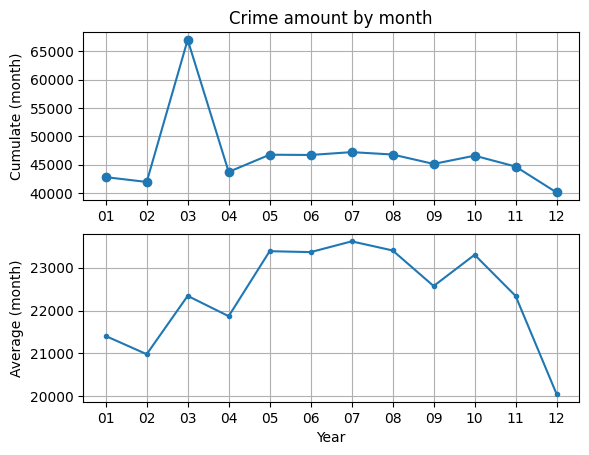

In [56]:
import matplotlib.pyplot as plt
import numpy as np

y = monthArray
t = monthTotalArray
a = monthAvgArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Crime amount by month')
plt.ylabel('Cumulate (month)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

# **Create dataframe to retrieve information by year (total and average)**

In [58]:
# Create dataframe to retrieve information by year (total and average)
yearlyCrimeAmount = sqlContext.sql("select substring(Month, 0, 4) \
as Year, SUM(count) as Total, avg(count) as Average from \
tbl_EnglandCrime2 group by substring(Month, 0, 4)")


In [59]:
yearlyCrimeAmount

DataFrame[Year: string, Total: bigint, Average: double]

In [60]:
yearlyCrimeAmount.show()

+----+------+------------------+
|Year| Total|           Average|
+----+------+------------------+
|2022|275417|22951.416666666668|
|2023| 65386|21795.333333333332|
|2021|218768|           21876.8|
+----+------+------------------+



# **Register the yearly data in a temp table and show the contents**

In [61]:
# Register the yearly data in a temp table and show the contents
yearlyCrimeAmount.registerTempTable("yearlyCrimeAmount")
sqlContext.sql("select * from yearlyCrimeAmount").show()

+----+------+------------------+
|Year| Total|           Average|
+----+------+------------------+
|2022|275417|22951.416666666668|
|2023| 65386|21795.333333333332|
|2021|218768|           21876.8|
+----+------+------------------+



# **Prepare variables for visualisations**

In [62]:
# Prepare variables for visualisations

totalArray = sqlContext.sql("select Total from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
yearArray = sqlContext.sql("select Year from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()
averageArray = sqlContext.sql("select Average from yearlyCrimeAmount")\
.rdd.map(lambda f:f[0]).collect()

# **Plot visualisations**

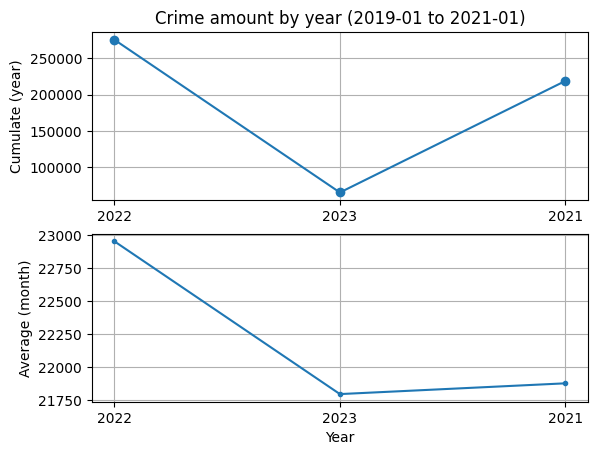

In [63]:
# Plot visualisations
import matplotlib.pyplot as plt
import numpy as np

y = yearArray
t = totalArray
a = averageArray

plt.subplot(2, 1, 1)
plt.plot(y, t, 'o-')
plt.title('Crime amount by year (2019-01 to 2021-01)')
plt.ylabel('Cumulate (year)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(y, a, '.-')
plt.xlabel('Year')
plt.ylabel('Average (month)')
plt.grid(True)
plt.savefig("yearlyCrimeAmount.png")
plt.show()

# **Monthly Crime Record Count Query**

In [64]:
sqlContext.sql("select Month, substring(Month, 0, 4) \
as Year, count(*) as Count from tbl_EnglandCrime group by Month").show()

+-------+----+-----+
|  Month|Year|Count|
+-------+----+-----+
|2022-04|2022|22809|
|2021-07|2021|22847|
|2022-06|2022|23580|
|2021-06|2021|23141|
|2022-02|2022|20567|
|2022-08|2022|24718|
|2021-11|2021|21887|
|2023-03|2023|22750|
|2022-07|2022|24375|
|2023-02|2023|21399|
|2021-10|2021|22801|
|2022-11|2022|22791|
|2022-10|2022|23795|
|2023-01|2023|21237|
|2022-09|2022|22807|
|2022-03|2022|23916|
|2022-05|2022|24734|
|2021-08|2021|22080|
|2022-12|2022|19747|
|2021-09|2021|22334|
+-------+----+-----+
only showing top 20 rows



In [65]:
EnglandCrime.printSchema()

root
 |-- Crime_ID: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reported_by: string (nullable = true)
 |-- Falls_within: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LSOA_code: string (nullable = true)
 |-- LSOA_name: string (nullable = true)
 |-- Crime_type: string (nullable = true)
 |-- Last_outcome_category: string (nullable = true)
 |-- Context: string (nullable = true)



# **Create a Temp Table**

In [66]:
# Create a Temp Table

EnglandCrime.registerTempTable("tbl_EnglandCrimeTypes")

# **Explore Crime Types per year/month**

In [67]:
# Explore Crime Types per year/month

CrimeTypes = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year,\
count(*) as Count from tbl_EnglandCrimeTypes group by Month, Crime_type")


In [68]:
CrimeTypes.show()

+--------------------+-------+----+-----+
|          Crime_type|  Month|Year|Count|
+--------------------+-------+----+-----+
|Anti-social behav...|2022-03|2022| 3220|
|       Vehicle crime|2023-02|2023|  982|
|Anti-social behav...|2021-10|2021| 3214|
|         Shoplifting|2022-11|2022| 1262|
|         Other theft|2022-02|2022| 1428|
|Possession of wea...|2021-08|2021|  173|
|         Shoplifting|2023-03|2023| 1421|
|       Vehicle crime|2023-03|2023| 1107|
|Possession of wea...|2022-05|2022|  193|
|Criminal damage a...|2023-01|2023| 1910|
|Criminal damage a...|2022-07|2022| 2258|
|               Drugs|2022-10|2022|  556|
|       Bicycle theft|2021-11|2021|  456|
|               Drugs|2021-07|2021|  524|
|Possession of wea...|2022-10|2022|  206|
|Violence and sexu...|2021-07|2021| 8393|
|             Robbery|2021-07|2021|  151|
|        Public order|2023-03|2023| 2252|
|Possession of wea...|2021-06|2021|  151|
|Criminal damage a...|2022-08|2022| 2308|
+--------------------+-------+----

# **Explore Crime Types per year/month**

In [69]:
# Explore Crime Types per year/month

CrimeTypesGeo = sqlContext.sql("select Crime_type, Month, \
substring(Month, 0, 4) as Year, Latitude, Longitude, \
count(*) as Count from tbl_EnglandCrimeTypes group by Month, \
Crime_type, Latitude, Longitude")


# **Converting my data to pandas dataframe**

In [70]:
pandas_df = EnglandCrime.toPandas()

In [71]:
crime_count_by_type = pandas_df['Crime_type'].value_counts()

# **Types of Criminal Offenses Breakdown**

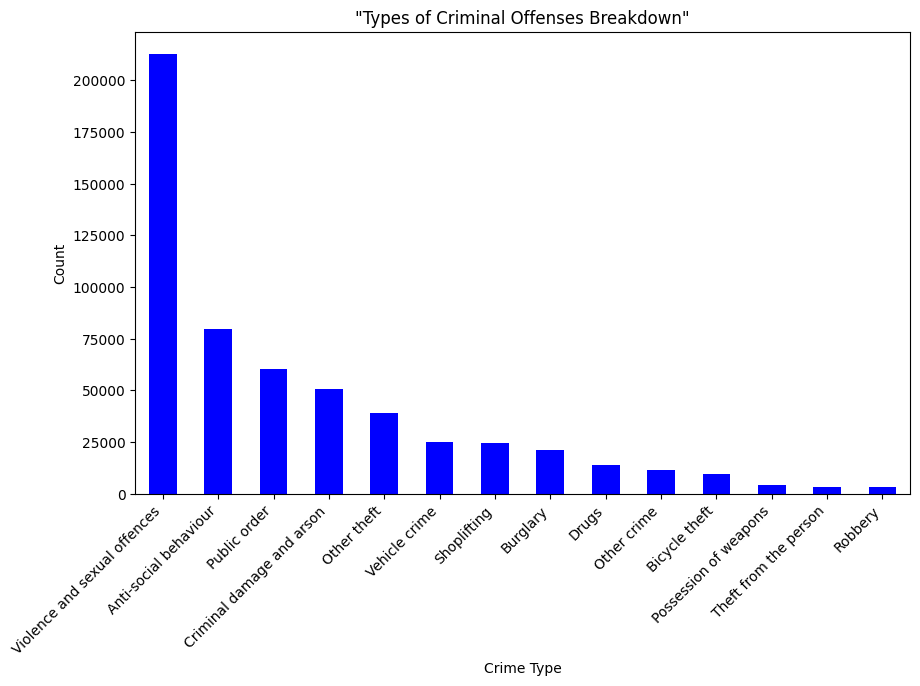

In [72]:
crime_count_by_type.plot(kind='bar', color='blue', figsize=(10, 6))
plt.title('"Types of Criminal Offenses Breakdown"')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [74]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559571 entries, 0 to 559570
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Crime_ID               479858 non-null  object 
 1   Month                  559571 non-null  object 
 2   Reported_by            559571 non-null  object 
 3   Falls_within           559571 non-null  object 
 4   Longitude              547950 non-null  float64
 5   Latitude               547950 non-null  float64
 6   Location               559571 non-null  object 
 7   LSOA_code              547950 non-null  object 
 8   LSOA_name              547950 non-null  object 
 9   Crime_type             559571 non-null  object 
 10  Last_outcome_category  479858 non-null  object 
 11  Context                0 non-null       object 
dtypes: float64(2), object(10)
memory usage: 51.2+ MB


In [75]:
pandas_df.head()

,Crime_ID,Month,Reported_by,Falls_within,Longitude,Latitude,Location,LSOA_code,LSOA_name,Crime_type,Last_outcome_category,Context
0,f452c4f173253a9047a32f7e065820df600b01e8fa13c8...,2022-05,Leicestershire Police,Leicestershire Police,-1.214768,52.622431,On or near Queens Drive,E01025631,Blaby 002A,Burglary,Awaiting court outcome,None
1,7e8c156f99e28cf26f8ae9c05c4def8c102481e3fc3d88...,2022-05,Leicestershire Police,Leicestershire Police,-1.214176,52.621663,On or near Lowland Avenue,E01025631,Blaby 002A,Public order,Investigation complete; no suspect identified,None
2,92068d66fa7c47414d534780fa7cc9d7798e3db3f8ab00...,2022-05,Leicestershire Police,Leicestershire Police,-1.217961,52.619800,On or near Galahad Close,E01025631,Blaby 002A,Violence and sexual offences,Unable to prosecute suspect,None
3,None,2022-05,Leicestershire Police,Leicestershire Police,-1.225664,52.616057,On or near Yew Close,E01025632,Blaby 002B,Anti-social behaviour,None,None
4,None,2022-05,Leicestershire Police,Leicestershire Police,-1.223572,52.618237,On or near Begonia Close,E01025632,Blaby 002B,Anti-social behaviour,None,None


# **Geographial distribution of crimes**

dict_keys(['OpenStreetMap', 'MapTilesAPI', 'OpenSeaMap', 'OPNVKarte', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Stadia', 'Thunderforest', 'CyclOSM', 'Jawg', 'MapBox', 'MapTiler', 'TomTom', 'Esri', 'OpenWeatherMap', 'HERE', 'HEREv3', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'GeoportailFrance', 'OneMapSG', 'USGS', 'WaymarkedTrails', 'OpenAIP', 'OpenSnowMap', 'AzureMaps', 'SwissFederalGeoportal', 'Gaode', 'Strava', 'OrdnanceSurvey'])


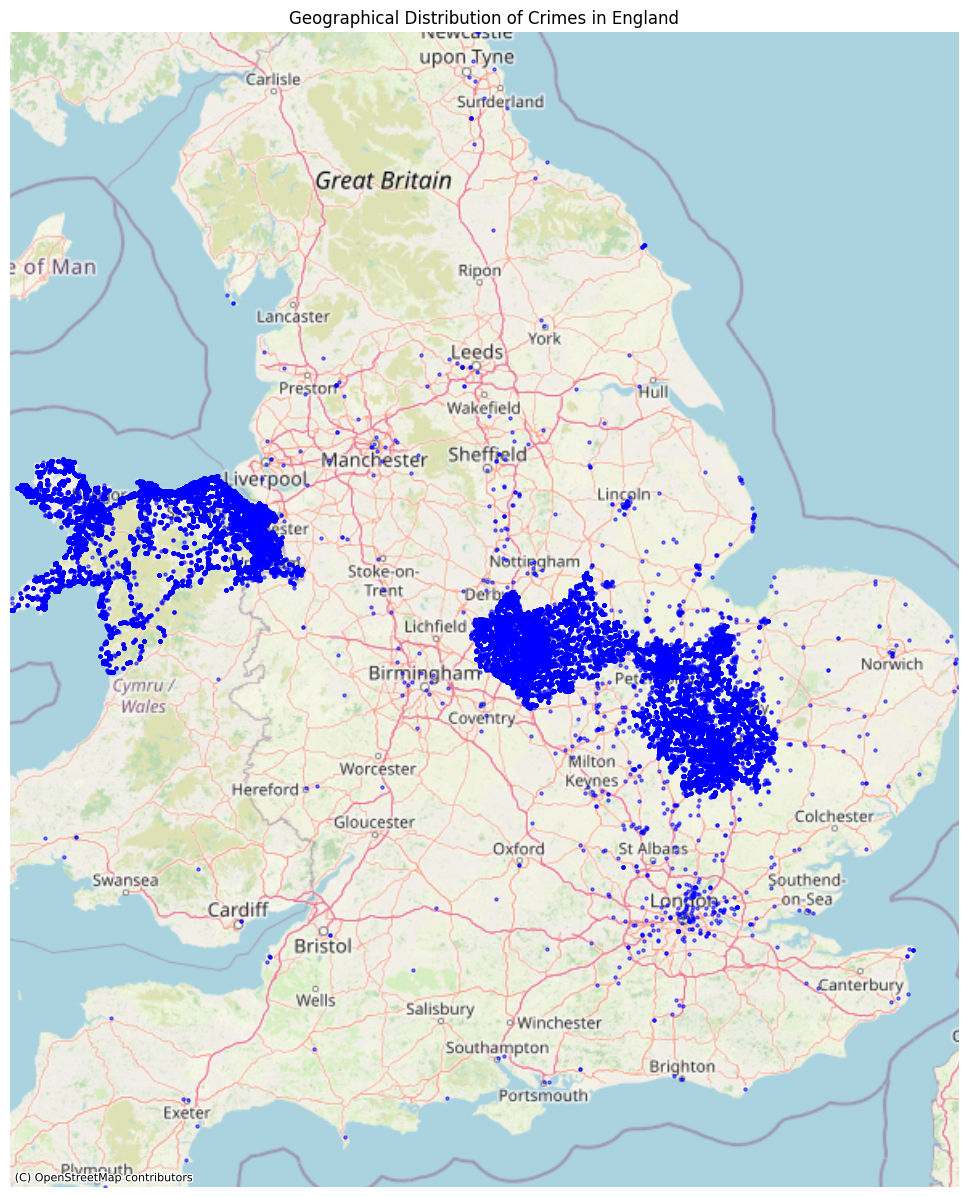

In [79]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Assuming your DataFrame is named pandas_df
# and it's already been filtered to contain non-null Longitudes and Latitudes

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(pandas_df, geometry=gpd.points_from_xy(pandas_df.Longitude, pandas_df.Latitude))

# Set the coordinate system to WGS84 (latitude/longitude)
gdf.crs = 'EPSG:4326'

# Convert the GeoDataFrame to Web Mercator for overlaying with web tiles
gdf = gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
gdf.plot(ax=ax, color='blue', alpha=0.5, markersize=5)

import contextily as ctx
print(ctx.providers.keys())

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
# Adjust the map extent to the data extent
ax.set_xlim(gdf.total_bounds[[0, 2]])
ax.set_ylim(gdf.total_bounds[[1, 3]])

# Remove axis clutter
ax.set_axis_off()

plt.title('Geographical Distribution of Crimes in England')
plt.show()


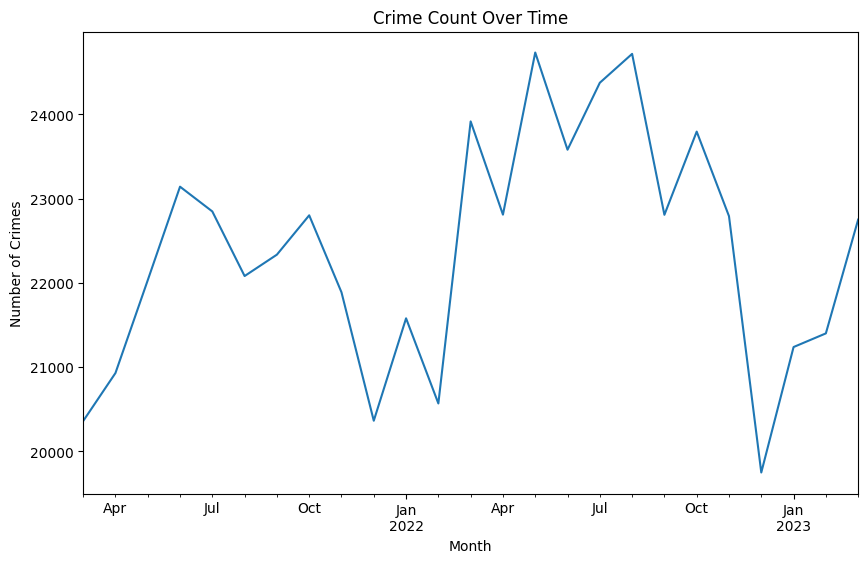

In [81]:
# Time-Series Analysis
# Convert 'Month' to datetime and sort
pandas_df['Month'] = pd.to_datetime(pandas_df['Month'])
ts_df = pandas_df.groupby(pandas_df['Month'].dt.to_period('M')).size()
plt.figure(figsize=(10, 6))
ts_df.plot(kind='line')
plt.title('Crime Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

In [82]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559571 entries, 0 to 559570
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Crime_ID               479858 non-null  object        
 1   Month                  559571 non-null  datetime64[ns]
 2   Reported_by            559571 non-null  object        
 3   Falls_within           559571 non-null  object        
 4   Longitude              547950 non-null  float64       
 5   Latitude               547950 non-null  float64       
 6   Location               559571 non-null  object        
 7   LSOA_code              547950 non-null  object        
 8   LSOA_name              547950 non-null  object        
 9   Crime_type             559571 non-null  object        
 10  Last_outcome_category  479858 non-null  object        
 11  Context                0 non-null       object        
dtypes: datetime64[ns](1), float64(2), object(9)


# **Crime Count Over Time**

NameError: name 'mdates' is not defined

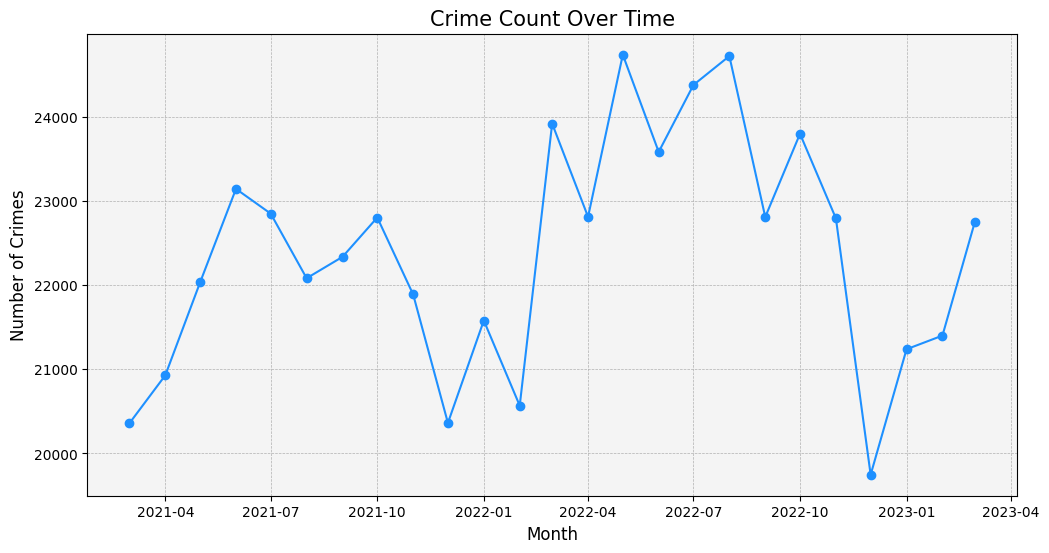

In [83]:
# Assuming your DataFrame is named pandas_df
# and the 'Month' column is already converted to datetime

# Group by 'Month' and count the number of crimes
ts_df = pandas_df.groupby(pandas_df['Month'].dt.to_period('M')).size()

# Convert the time period back to datetime for plotting
ts_df.index = ts_df.index.to_timestamp()

# Plotting
plt.figure(figsize=(12, 6))

# Plot with a line and markers
plt.plot(ts_df.index, ts_df, linestyle='-', marker='o', color='dodgerblue', markersize=6)

# Formatting the plot to make it more attractive
plt.title('Crime Count Over Time', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.gca().set_facecolor('#f4f4f4')  # Light grey background

# Improve x-axis with month formatting
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# Rotate and align the tick labels so they look better
plt.gcf().autofmt_xdate()

# Add a legend if needed
# plt.legend(['Crime Count'], loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
